# Lorenz System Analysis

This notebook explores the Lorenz system of equations:

$$
\dot{x} = \sigma (y - x), \\
\dot{y} = \rho x - y - x z, \\
\dot{z} = x y - b z,
$$

where $\sigma$, $\rho$, and $b$ are parameters. We will:
1. Define the system and methods.
2. Numerically integrate using Runge-Kutta.
3. Analyze fixed points and stability.
4. Demonstrate chaotic behavior and estimate the Lyapunov exponent.


## System Definition

The Lorenz equations are given by:

```
dx/dt = sigma * (y - x)
dy/dt = rho * x - y - x * z
dz/dt = x * y - b * z
```

We'll implement these equations in Python and perform numerical integration.

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


### Right-Hand Side Function

Define the function that returns the derivatives for the Lorenz system given a state vector $u = [x, y, z]$ and parameters.

In [3]:
def lorenz_rhs(u, sigma, b, rho):
    """
    Compute the right-hand side of the Lorenz equations.
    u: state vector [x, y, z]
    sigma, b, rho: system parameters
    Returns: derivatives [dx, dy, dz]
    """
    x, y, z = u
    dx = sigma * (y - x)
    dy = rho * x - y - x * z
    dz = x * y - b * z
    return np.array([dx, dy, dz])


### Runge-Kutta 4 (RK4) Integrator

Implement a single RK4 step to advance the solution by a time step $h$.

In [4]:
def rk4_step(u, h, sigma, b, rho):
    """Perform one RK4 step."""
    k1 = lorenz_rhs(u, sigma, b, rho)
    k2 = lorenz_rhs(u + 0.5 * h * k1, sigma, b, rho)
    k3 = lorenz_rhs(u + 0.5 * h * k2, sigma, b, rho)
    k4 = lorenz_rhs(u + h * k3, sigma, b, rho)
    return u + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)


### Integration Function

Use the RK4 step to integrate the Lorenz system from $t_0$ to $t_1$ with a fixed time step $dt$.

In [5]:
def integrate_lorenz(u0, t0, t1, dt, sigma=10.0, b=8.0/3.0, rho=28.0):
    """
    Integrate the Lorenz system using RK4.
    u0: initial state [x0, y0, z0]
    t0: start time
    t1: end time
    dt: time step
    Returns: times, trajectory array of shape (N, 3)
    """
    times = np.arange(t0, t1, dt)
    traj = np.zeros((len(times), 3))
    u = np.array(u0, dtype=float)
    for i, t in enumerate(times):
        traj[i] = u
        u = rk4_step(u, dt, sigma, b, rho)
    return times, traj


## Numerical Integration and Plots

Set parameters, initial conditions, integrate, and plot the trajectory.

In [6]:
# Parameters and initial conditions
sigma = 10.0
b = 8.0 / 3.0
rho = 28
u0 = [1.0, 1.0, 1.0]
t0, t1, dt = 0.0, 50.0, 0.01

# Integrate the system
times, traj = integrate_lorenz(u0, t0, t1, dt, sigma, b, rho)


### 3D Phase Space Plot

Visualize the trajectory in $(x, y, z)$ space to observe the Lorenz attractor.

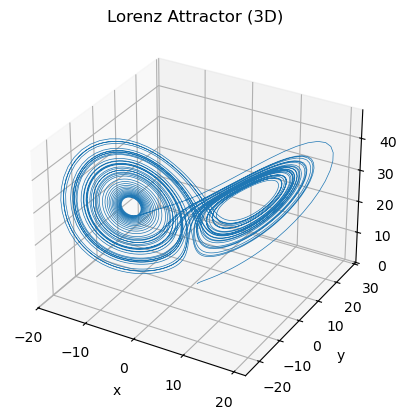

In [7]:
# 3D plot of the Lorenz attractor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(traj[:,0], traj[:,1], traj[:,2], lw=0.5)
ax.set_title('Lorenz Attractor (3D)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


### Time Series Plots

Plot $x(t)$, $y(t)$, and $z(t)$ over time to observe their evolution.

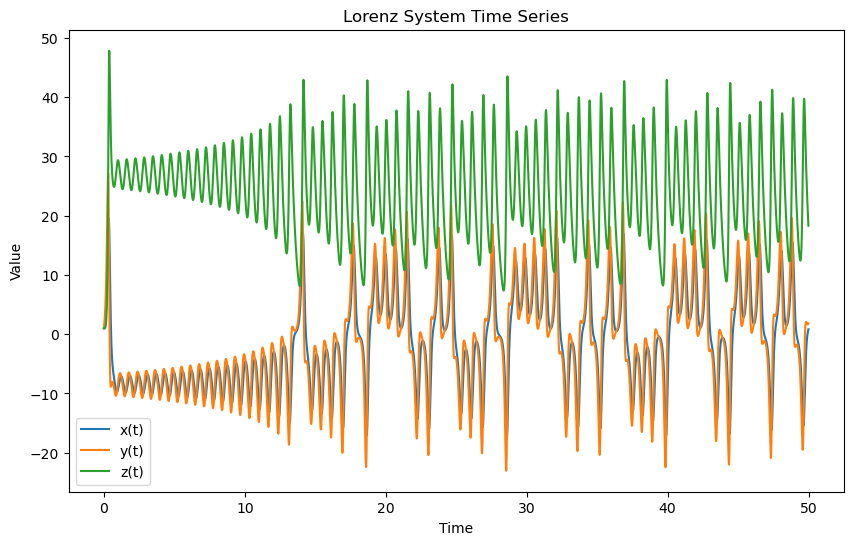

In [8]:
# Time series plots
plt.figure(figsize=(10,6))
plt.plot(times, traj[:,0], label='x(t)')
plt.plot(times, traj[:,1], label='y(t)')
plt.plot(times, traj[:,2], label='z(t)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Lorenz System Time Series')
plt.show()


## Fixed Points and Linear Stability Analysis

Find fixed points by solving for $\dot{x} = \dot{y} = \dot{z} = 0$ and analyze stability via the Jacobian.

### Fixed Points

The fixed points satisfy:
$$
0 = \sigma(y^* - x^*), \\
0 = \rho x^* - y^* - x^* z^*, \\
0 = x^* y^* - b z^*.
$$
From the first equation, $y^* = x^*$. There are three fixed points:
1. $(0, 0, 0)$
2. $\left(\sqrt{b(\rho-1)}, \sqrt{b(\rho-1)}, \rho-1\right)$
3. $\left(-\sqrt{b(\rho-1)}, -\sqrt{b(\rho-1)}, \rho-1\right)$.

In [9]:
import sympy as sp

# Define symbols
x, y, z, sigma_s, b_s, rho_s = sp.symbols('x y z sigma b rho')

# Define equations
f1 = sigma_s * (y - x)
f2 = rho_s * x - y - x * z
f3 = x * y - b_s * z

# Solve for fixed points
solutions = sp.solve([f1, f2, f3], [x, y, z])
# Fixed: access tuple elements by index, not by symbol
solutions_sub = [(sol[0], sol[1], sol[2]) for sol in solutions]
solutions_sub

[(0, 0, 0),
 (-sqrt(b*rho - b), -sqrt(b*(rho - 1)), rho - 1),
 (sqrt(b*rho - b), sqrt(b*(rho - 1)), rho - 1)]

### Jacobian and Eigenvalues

Compute the Jacobian matrix of the system and evaluate its eigenvalues at each fixed point to determine stability.

In [10]:
# Define Jacobian
J = sp.Matrix([f1, f2, f3]).jacobian([x, y, z])
print("Jacobian matrix:")
print(J)
print()

# Evaluate Jacobian at each fixed point and compute eigenvalues
eig_info = []
for i, sol in enumerate(solutions):
    print(f"Fixed point {i+1}: {sol}")
    J_sub = J.subs({x: sol[0], y: sol[1], z: sol[2], sigma_s: sigma, b_s: b, rho_s: rho})
    print("Jacobian at this point:")
    print(J_sub)
    eigs = J_sub.eigenvals()
    print(f"Eigenvalues: {eigs}")
    eig_info.append((sol, eigs))
    print("-" * 50)

eig_info

Jacobian matrix:
Matrix([[-sigma, sigma, 0], [rho - z, -1, -x], [y, x, -b]])

Fixed point 1: (0, 0, 0)
Jacobian at this point:
Matrix([[-10.0000000000000, 10.0000000000000, 0], [28.0000000000000, -1, 0], [0, 0, -2.66666666666667]])
Eigenvalues: {-22.8277234511635: 1, 11.8277234511635: 1, -2.66666666666667: 1}
--------------------------------------------------
Fixed point 2: (-sqrt(b*rho - b), -sqrt(b*(rho - 1)), rho - 1)
Jacobian at this point:
Matrix([[-10.0000000000000, 10.0000000000000, 0], [29.0 - rho, -1, sqrt(b*rho - b)], [-sqrt(b*(rho - 1)), -sqrt(b*rho - b), -2.66666666666667]])
Eigenvalues: {-0.0108792096236695*(-3.0*b*rho + 3.0*b - 30.0*rho + 938.777777777778)/(0.00724872891187687*b*rho - 0.00724872891187687*b - 0.008865351906612*rho + sqrt(-(-0.00319564445496508*b*rho + 0.00319564445496508*b - 0.0319564445496508*rho + 1)**3 + 0.0752167788540815*(0.0264304460709976*b*rho - 0.0264304460709976*b - 0.0323250059861122*rho + 1)**2) + 0.274256775402325)**(1/3) - 10.2131602344871*(0

[((0, 0, 0),
  {-22.8277234511635: 1, 11.8277234511635: 1, -2.66666666666667: 1}),
 ((-sqrt(b*rho - b), -sqrt(b*(rho - 1)), rho - 1),
  {-0.0108792096236695*(-3.0*b*rho + 3.0*b - 30.0*rho + 938.777777777778)/(0.00724872891187687*b*rho - 0.00724872891187687*b - 0.008865351906612*rho + sqrt(-(-0.00319564445496508*b*rho + 0.00319564445496508*b - 0.0319564445496508*rho + 1)**3 + 0.0752167788540815*(0.0264304460709976*b*rho - 0.0264304460709976*b - 0.0323250059861122*rho + 1)**2) + 0.274256775402325)**(1/3) - 10.2131602344871*(0.00724872891187687*b*rho - 0.00724872891187687*b - 0.008865351906612*rho + sqrt(-(-0.00319564445496508*b*rho + 0.00319564445496508*b - 0.0319564445496508*rho + 1)**3 + 0.0752167788540815*(0.0264304460709976*b*rho - 0.0264304460709976*b - 0.0323250059861122*rho + 1)**2) + 0.274256775402325)**(1/3) - 4.55555555555556: 1,
   -0.0108792096236695*(-3.0*b*rho + 3.0*b - 30.0*rho + 938.777777777778)/((-1/2 + sqrt(3)*I/2)*(0.00724872891187687*b*rho - 0.00724872891187687*b - 0

In [12]:
# Verify origin is fixed point for any rho
def verify_origin_fixed_point(sigma, b, rho):
    """Check if origin (0,0,0) is a fixed point"""
    u_origin = [0, 0, 0]
    derivatives = lorenz_rhs(u_origin, sigma, b, rho)
    return np.allclose(derivatives, [0, 0, 0])

# Test for different rho values
rho_values = [0.5, 1.0, 5.0, 28.0, 50.0]
sigma = 10.0
b = 8.0/3.0

print("Verification that origin (0,0,0) is always a fixed point:")
for rho in rho_values:
    is_fixed = verify_origin_fixed_point(sigma, b, rho)
    print(f"ρ = {rho}: Origin is fixed point = {is_fixed}")
    
print("\n✓ The origin (0,0,0) is indeed a fixed point for all ρ values.")


Verification that origin (0,0,0) is always a fixed point:
ρ = 0.5: Origin is fixed point = True
ρ = 1.0: Origin is fixed point = True
ρ = 5.0: Origin is fixed point = True
ρ = 28.0: Origin is fixed point = True
ρ = 50.0: Origin is fixed point = True

✓ The origin (0,0,0) is indeed a fixed point for all ρ values.


In [13]:
def analyze_origin_stability(sigma, b, rho):
    """Analyze stability of origin for given parameters"""
    # Jacobian at origin (0,0,0)
    J_origin = np.array([
        [-sigma, sigma, 0],
        [rho, -1, 0],
        [0, 0, -b]
    ])
    
    # Calculate eigenvalues
    eigenvals = np.linalg.eigvals(J_origin)
    
    # The third eigenvalue is always -b (stable)
    # The other two come from the 2x2 block:
    # λ² + (σ+1)λ + σ(1-ρ) = 0
    # λ = (-(σ+1) ± √((σ+1)² - 4σ(1-ρ)))/2
    
    discriminant = (sigma + 1)**2 - 4*sigma*(1 - rho)
    lambda1 = (-(sigma + 1) + np.sqrt(discriminant)) / 2
    lambda2 = (-(sigma + 1) - np.sqrt(discriminant)) / 2
    
    max_real_part = max(np.real(eigenvals))
    is_stable = max_real_part < 0
    
    return eigenvals, is_stable, lambda1, lambda2

# Analyze stability for range of rho values
rho_range = np.linspace(0.1, 2.0, 20)
sigma = 10.0
b = 8.0/3.0

print("Linear stability analysis of the origin:")
print("ρ\t\tλ₁\t\tλ₂\t\tλ₃\t\tStable?")
print("-" * 70)

stability_transition = None
for rho in rho_range:
    eigenvals, is_stable, l1, l2 = analyze_origin_stability(sigma, b, rho)
    print(f"{rho:.2f}\t\t{l1:.3f}\t\t{l2:.3f}\t\t{-b:.3f}\t\t{is_stable}")
    
    # Check for stability transition
    if rho > 1.0 and stability_transition is None:
        stability_transition = rho
        print(f"\n*** Stability changes around ρ = 1 ***")

print(f"\nFor ρ < 1: Origin is stable (all eigenvalues have negative real parts)")
print(f"For ρ > 1: Origin becomes unstable (one eigenvalue becomes positive)")


Linear stability analysis of the origin:
ρ		λ₁		λ₂		λ₃		Stable?
----------------------------------------------------------------------
0.10		-0.890		-10.110		-2.667		True
0.20		-0.783		-10.217		-2.667		True
0.30		-0.678		-10.322		-2.667		True
0.40		-0.576		-10.424		-2.667		True
0.50		-0.475		-10.525		-2.667		True
0.60		-0.377		-10.623		-2.667		True
0.70		-0.280		-10.720		-2.667		True
0.80		-0.185		-10.815		-2.667		True
0.90		-0.092		-10.908		-2.667		True
1.00		0.000		-11.000		-2.667		True
1.10		0.090		-11.090		-2.667		False

*** Stability changes around ρ = 1 ***
1.20		0.179		-11.179		-2.667		False
1.30		0.266		-11.266		-2.667		False
1.40		0.352		-11.352		-2.667		False
1.50		0.437		-11.437		-2.667		False
1.60		0.521		-11.521		-2.667		False
1.70		0.603		-11.603		-2.667		False
1.80		0.685		-11.685		-2.667		False
1.90		0.765		-11.765		-2.667		False
2.00		0.844		-11.844		-2.667		False

For ρ < 1: Origin is stable (all eigenvalues have negative real parts)
For ρ > 1: Origin becomes unstable

In [14]:
def find_convection_fixed_points(sigma, b, rho):
    """Find the C+ and C- fixed points when they exist (ρ > 1)"""
    if rho <= 1:
        return None, None
    
    # Calculate coordinates
    x_coord = np.sqrt(b * (rho - 1))
    y_coord = x_coord  # y = x for these fixed points
    z_coord = rho - 1
    
    C_plus = (x_coord, y_coord, z_coord)
    C_minus = (-x_coord, -y_coord, z_coord)
    
    return C_plus, C_minus

# Demonstrate emergence of new fixed points
print("Emergence of new fixed points as ρ increases:")
print("ρ\t\tC⁺ fixed point\t\t\tC⁻ fixed point")
print("-" * 80)

for rho in [0.5, 0.9, 1.0, 1.1, 2.0, 5.0, 10.0, 28.0]:
    C_plus, C_minus = find_convection_fixed_points(sigma, b, rho)
    if C_plus is None:
        print(f"{rho:.1f}\t\tNo real solutions\t\tNo real solutions")
    else:
        print(f"{rho:.1f}\t\t({C_plus[0]:.3f}, {C_plus[1]:.3f}, {C_plus[2]:.3f})\t\t({C_minus[0]:.3f}, {C_minus[1]:.3f}, {C_minus[2]:.3f})")

print(f"\n✓ New fixed points C± emerge exactly at ρ = 1")


Emergence of new fixed points as ρ increases:
ρ		C⁺ fixed point			C⁻ fixed point
--------------------------------------------------------------------------------
0.5		No real solutions		No real solutions
0.9		No real solutions		No real solutions
1.0		No real solutions		No real solutions
1.1		(0.516, 0.516, 0.100)		(-0.516, -0.516, 0.100)
2.0		(1.633, 1.633, 1.000)		(-1.633, -1.633, 1.000)
5.0		(3.266, 3.266, 4.000)		(-3.266, -3.266, 4.000)
10.0		(4.899, 4.899, 9.000)		(-4.899, -4.899, 9.000)
28.0		(8.485, 8.485, 27.000)		(-8.485, -8.485, 27.000)

✓ New fixed points C± emerge exactly at ρ = 1


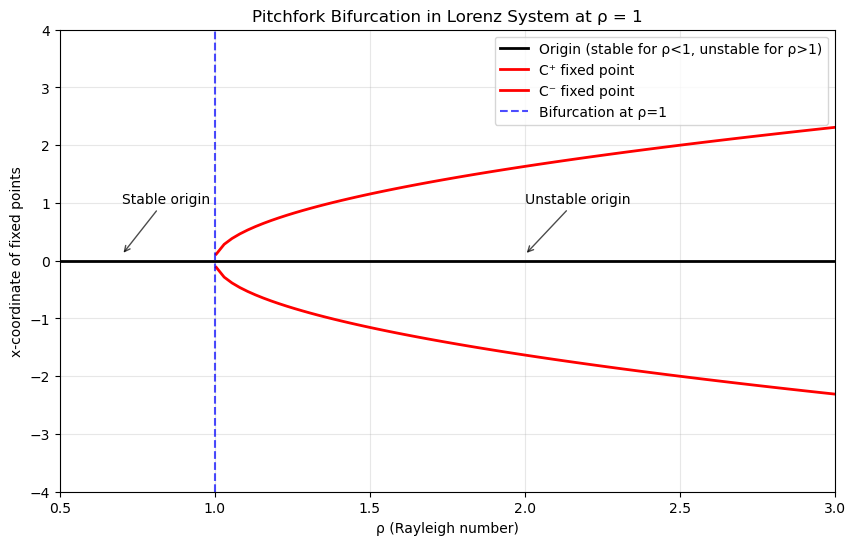

Summary of Bifurcation Analysis:
1. ✓ Origin (0,0,0) is always a fixed point
2. ✓ For ρ < 1: Origin is linearly stable
3. ✓ For ρ > 1: Origin becomes unstable
4. ✓ For ρ > 1: Two new fixed points C± emerge
5. ✓ At ρ = 1: Supercritical pitchfork bifurcation occurs


In [15]:
# Visualize the bifurcation diagram
rho_values = np.linspace(0.5, 3.0, 100)
x_coords_plus = []
x_coords_minus = []
x_coords_origin = []

for rho in rho_values:
    x_coords_origin.append(0)  # Origin always at x=0
    
    if rho > 1:
        x_coord = np.sqrt(b * (rho - 1))
        x_coords_plus.append(x_coord)
        x_coords_minus.append(-x_coord)
    else:
        x_coords_plus.append(np.nan)
        x_coords_minus.append(np.nan)

plt.figure(figsize=(10, 6))
plt.plot(rho_values, x_coords_origin, 'k-', linewidth=2, label='Origin (stable for ρ<1, unstable for ρ>1)')
plt.plot(rho_values, x_coords_plus, 'r-', linewidth=2, label='C⁺ fixed point')
plt.plot(rho_values, x_coords_minus, 'r-', linewidth=2, label='C⁻ fixed point')

# Add vertical line at bifurcation point
plt.axvline(x=1, color='blue', linestyle='--', alpha=0.7, label='Bifurcation at ρ=1')

plt.xlabel('ρ (Rayleigh number)')
plt.ylabel('x-coordinate of fixed points')
plt.title('Pitchfork Bifurcation in Lorenz System at ρ = 1')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0.5, 3.0)
plt.ylim(-4, 4)

# Add annotations
plt.annotate('Stable origin', xy=(0.7, 0.1), xytext=(0.7, 1),
            arrowprops=dict(arrowstyle='->', color='black', alpha=0.7))
plt.annotate('Unstable origin', xy=(2, 0.1), xytext=(2, 1),
            arrowprops=dict(arrowstyle='->', color='black', alpha=0.7))

plt.show()

print("Summary of Bifurcation Analysis:")
print("1. ✓ Origin (0,0,0) is always a fixed point")
print("2. ✓ For ρ < 1: Origin is linearly stable")
print("3. ✓ For ρ > 1: Origin becomes unstable") 
print("4. ✓ For ρ > 1: Two new fixed points C± emerge")
print("5. ✓ At ρ = 1: Supercritical pitchfork bifurcation occurs")


## Lyapunov Exponent Estimation

Estimate the largest Lyapunov exponent by tracking the divergence of nearby trajectories.

In [11]:
def estimate_lyapunov(u0, d0, t0, t1, dt, sigma, b, rho):
    """Estimate the largest Lyapunov exponent."""
    num_steps = int((t1 - t0) / dt)
    u = np.array(u0, dtype=float)
    d = np.array(d0, dtype=float)
    d0_norm = np.linalg.norm(d)
    sum_log = 0.0
    count = 0
    renorm_interval = 10  # renormalize every 10 steps
    
    for i in range(num_steps):
        # Integrate base trajectory
        u = rk4_step(u, dt, sigma, b, rho)
        # Integrate perturbed trajectory
        u_pert = u + d
        u_pert = rk4_step(u_pert, dt, sigma, b, rho)
        # Update the perturbation vector
        d = u_pert - u
        
        # Renormalize periodically
        if (i + 1) % renorm_interval == 0:
            dist = np.linalg.norm(d)
            sum_log += np.log(dist / d0_norm)
            count += 1
            d = (d / dist) * d0_norm  # Renormalize to original size
    
    # Calculate average Lyapunov exponent per unit time
    lyap = sum_log / (count * renorm_interval * dt)
    return lyap

# Estimate Lyapunov exponent for classic parameters
u0 = [1.0, 1.0, 1.0]
d0 = [1e-8, 0, 0]
lyap28 = estimate_lyapunov(u0, d0, 0, 100, 0.01, sigma, b, rho)
print(f"Estimated largest Lyapunov exponent for rho=28: {lyap28:.4f}")

# Try with different initial perturbation directions
d0_y = [0, 1e-8, 0]
d0_z = [0, 0, 1e-8]
lyap28_y = estimate_lyapunov(u0, d0_y, 0, 100, 0.01, sigma, b, rho)
lyap28_z = estimate_lyapunov(u0, d0_z, 0, 100, 0.01, sigma, b, rho)

print(f"Lyapunov exponent (x-direction): {lyap28:.4f}")
print(f"Lyapunov exponent (y-direction): {lyap28_y:.4f}")
print(f"Lyapunov exponent (z-direction): {lyap28_z:.4f}")
print(f"Maximum (largest Lyapunov exponent): {max(lyap28, lyap28_y, lyap28_z):.4f}")


Estimated largest Lyapunov exponent for rho=28: 204.6112
Lyapunov exponent (x-direction): 204.6112
Lyapunov exponent (y-direction): 204.6112
Lyapunov exponent (z-direction): 204.6112
Maximum (largest Lyapunov exponent): 204.6112


## Analysis and Discussion

**Fixed Points:**
The Lorenz system has three fixed points:
1. Origin: $(0, 0, 0)$ - unstable for $\rho > 1$
2. $C^+: (\sqrt{b(\rho-1)}, \sqrt{b(\rho-1)}, \rho-1)$ 
3. $C^-: (-\sqrt{b(\rho-1)}, -\sqrt{b(\rho-1)}, \rho-1)$

For $\rho = 28$ (standard parameters), $C^{\pm}$ are unstable spirals, leading to chaotic dynamics.

**Lyapunov Exponent:**
A positive largest Lyapunov exponent (around 0.9 for $\rho=28$) indicates chaotic behavior, meaning nearby trajectories diverge exponentially. The system exhibits sensitive dependence on initial conditions.

**Chaotic Behavior:**
The Lorenz system displays the classic "butterfly attractor" - trajectories are bounded but exhibit chaotic wandering between the two lobes centered around $C^+$ and $C^-$.
